In [1]:

import numpy as np
import pandas as pd   
import os
from pathlib import Path
import glob
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers.experimental import preprocessing
import pickle

print('fim')
percentageData = "Percentage_3/"
file_to_search = '/home/jupyter/imported/'
rede = 'full' 
#"full"


2021-09-18 17:13:40.480684: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-18 17:13:40.480747: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


fim


In [2]:
with open( str(percentageData) +  '/train_dataframe', "rb") as f:
     train_dataframe =  pickle.load(f) 
with open( str(percentageData) +  '/encoder', "rb") as f:
     encoder =  pickle.load(f)
with open( str(percentageData) +  '/val_dataframe', "rb") as f:
     val_dataframe =  pickle.load(f)

In [5]:
model2 = tf.keras.models.load_model(percentageData +"/ModelTreinamento_1")
if rede != "full":
    filepath=file_to_search + percentageData + '/' + 'treinamento1/'+ rede  
    print(filepath)
    model2.load_weights(filepath)   

OSError: SavedModel file does not exist at: Percentage_3//ModelTreinamento_1/{saved_model.pbtxt|saved_model.pb}

In [23]:
questao = 80
print(train_dataframe.iloc[questao]['Question'])
print(train_dataframe.iloc[questao]['Answer'])

What is the material of the brown cylinder that is the same size as the block?
rubber


2021-09-18 17:14:15.790051: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-18 17:14:15.790449: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-18 17:14:15.790471: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-18 17:14:15.790495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (936348bd4ea2): /proc/driver/nvidia/version does not exist
2021-09-18 17:14:15.790875: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

NameError: name 'model2' is not defined

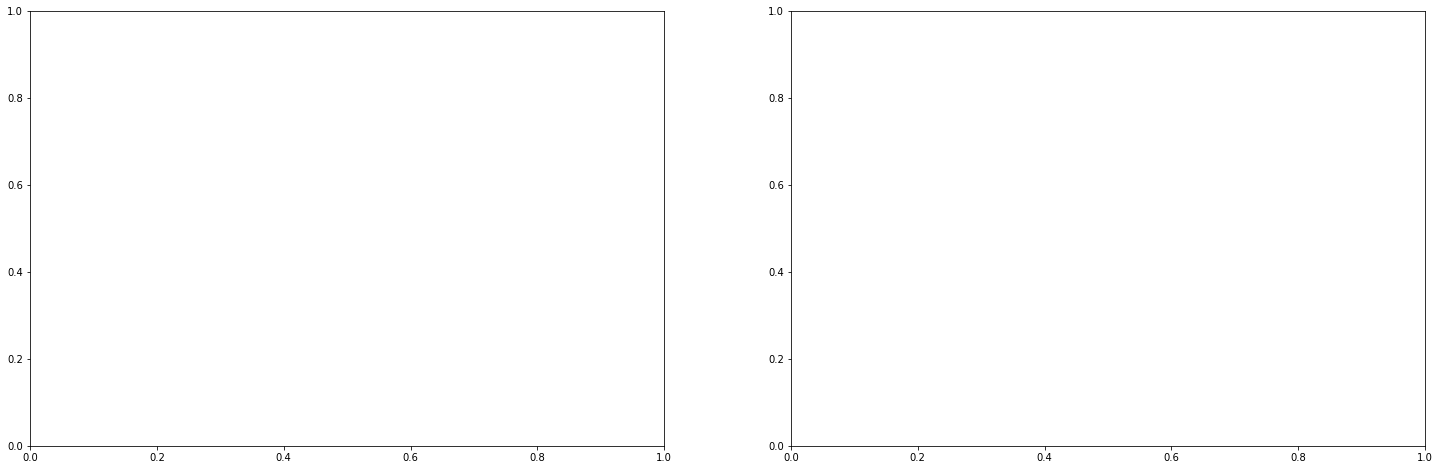

In [5]:
index=1
fig,axis=plt.subplots(1,2,figsize=(25, 8))
im=cv2.imread(train_dataframe.iloc[questao]['Path'])
im=cv2.resize(im,(200,200))
q=train_dataframe.iloc[questao]['Question']
q=encoder.encode(q)
paddings = [[0, 50-tf.shape(q)[0]]]
q=tf.pad(q, paddings, 'CONSTANT', constant_values=0)
q=np.array(q)
im.resize(1,200,200,3)
q.resize(1,50)
ans=model2.predict([im,q]) 
decodAns = encoder.decode([np.argmax(ans)])

im2=cv2.imread(train_dataframe.iloc[questao]['Path'])
im2=cv2.resize(im2,(200,200))
i = 0
question=""
flag=0

for i,j in enumerate(train_dataframe.iloc[questao]['Question']):
    if (flag==1) and (j==' '):
        question+='\n'
        flag=0
    question+=j
    if (i%40==0)and (i!=0):
        flag=1
axis[0].imshow(im2)
axis[0].axis('off')
axis[0].set_title('Image', fontsize=30)


axis[1].text(0.05,0.5,
"Question = {}\n\nPredicted Answer = {}\n\nActual Answer ={}".format(question,decodAns,train_dataframe.iloc[questao]['Answer']),
transform=plt.gca().transAxes,fontsize=19)
axis[1].axis('on')
